In [ ]:
def unet(dim, output_neurons, output_activation):
    
    def conv_block(input, n_filters, d_strides=1):
        x = DepthwiseConv2D(kernel_size = (3,3), strides = d_strides, padding = 'same')(input)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)
        x = Conv2D(filters = n_filters, kernel_size = (1,1))(x)
        x = BatchNormalization()(x)
        x = LeakyReLU()(x)

        return x

    def encoder_block(input, n_filters):
        x = conv_block(input, n_filters)
        x = conv_block(x, n_filters)
        p = MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'same')(x)
        return x,p

    def decoder_block(input, concat_layer, n_filters):
        x = Conv2DTranspose(n_filters, kernel_size = (2,2), strides=2, padding = 'same')(input)
        x = Concatenate()([x, concat_layer])
        x = conv_block(x, n_filters)
        x = conv_block(x, n_filters)
        return x

    inputs = Input(shape = dim)
    
    k = 16
    
    s1, p1 = encoder_block(inputs, k)
    s2, p2 = encoder_block(p1, 2*k)
    s3, p3 = encoder_block(p2, 4*k)
    s4, p4 = encoder_block(p3, 8*k)

    b1 = conv_block(p4, 16*k)

    d1 = decoder_block(b1, s4, 8*k)
    d2 = decoder_block(d1, s3, 4*k)
    d3 = decoder_block(d2, s2, 2*k)
    d4 = decoder_block(d3, s1, k)

    outputs = Conv2D(1, kernel_size = (1,1), padding='same', activation = output_activation)(d4)

    model = Model(inputs = inputs, outputs = outputs, name='Modified-U-Net')

    return model

In [1]:
import cv2
import numpy as np

In [7]:
img_path = '/home/rajarshi/tensorflow_datasets/downloads/extracted/TAR_GZ.robots.ox.ac.uk_vgg_pets_annotationsUkJftt5cQklCt2JrQoZW_L15jblwqTffYXUMDx01jpE.tar.gz/annotations/trimaps/Abyssinian_1.png'
img = cv2.imread(img_path,0)

In [23]:
for i in range(np.max(img)+1):
    if np.where(img == i)[0].size > 0:
        print(i)

1
2
3


In [30]:
np.where(img == 3)[0]

array([ 66,  66,  66, ..., 342, 342, 342])

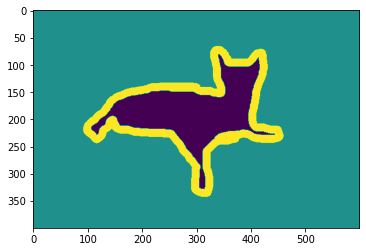

In [8]:
import matplotlib.pyplot as plt
plt.imshow(img)